In [28]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [20]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

In [21]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

In [22]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw()

┌───┐                                                               
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
     ├───┤ │                                                             
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
     ├───┤ │        │        │                                           
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) 
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
     └───┘                                                               
c: 3/════════════════════════════════════════════════════════════════════

In [6]:

# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

┌───┐                                                               »
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────»
     ├───┤ │        │        │                                           »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────»
     └───┘                                                               »
c: 3/════════════════════════════════════════════════════════════════════»
                                                                         »
«     ┌──────────┐ ░ ┌─┐      
«q_0: ┤0         ├─░─┤M├──────
«     │          │ ░ └╥┘┌─┐   
«q_1: ┤1 IQFT_dg ├─░──╫─┤M├───
«     │          │ ░  ║ └╥┘┌─┐
«q_2: ┤2         ├─░──╫──╫─┤M├
«     └──────────┘ ░  ║  ║ └╥┘
«q_3: ─────────────░──╫──╫──╫─
«                  ░  ║  ║  ║ 
«c: 3/════════════════╩══╩══╩═
«                     0  1  2

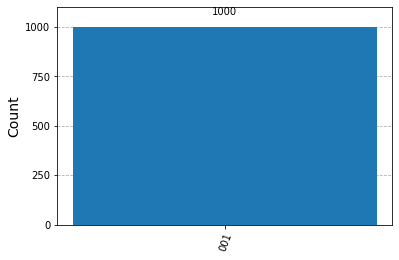

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [14]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/5
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │P(2π/5)  │P(2π/5)  │P(2π/5)  │P(2π/5)  │P(2π/5)  │P(2π/5) »
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«               ┌──────────┐┌─┐      
«q_0: ──────────┤0         ├┤M├──────
«               │          │└╥┘┌─┐   
«q_1: ──────────┤1 IQFT_dg ├─╫─┤M├───
«               │          │ ║ └╥┘┌─┐
«q_2: ─■────────┤2         ├─╫──╫─┤M├
«      │P(2π/5) └──────────┘ ║  ║ └╥┘
«q_3: ─■─────────────────────╫──╫──╫─
«                            ║  ║  ║ 
«c: 3/═══════════════════════╩══╩══╩═
«                            0  1  2

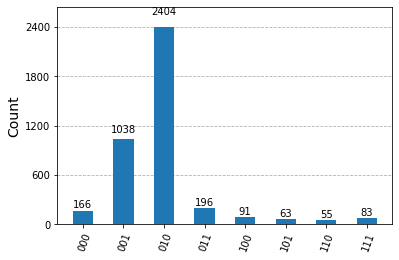

In [15]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

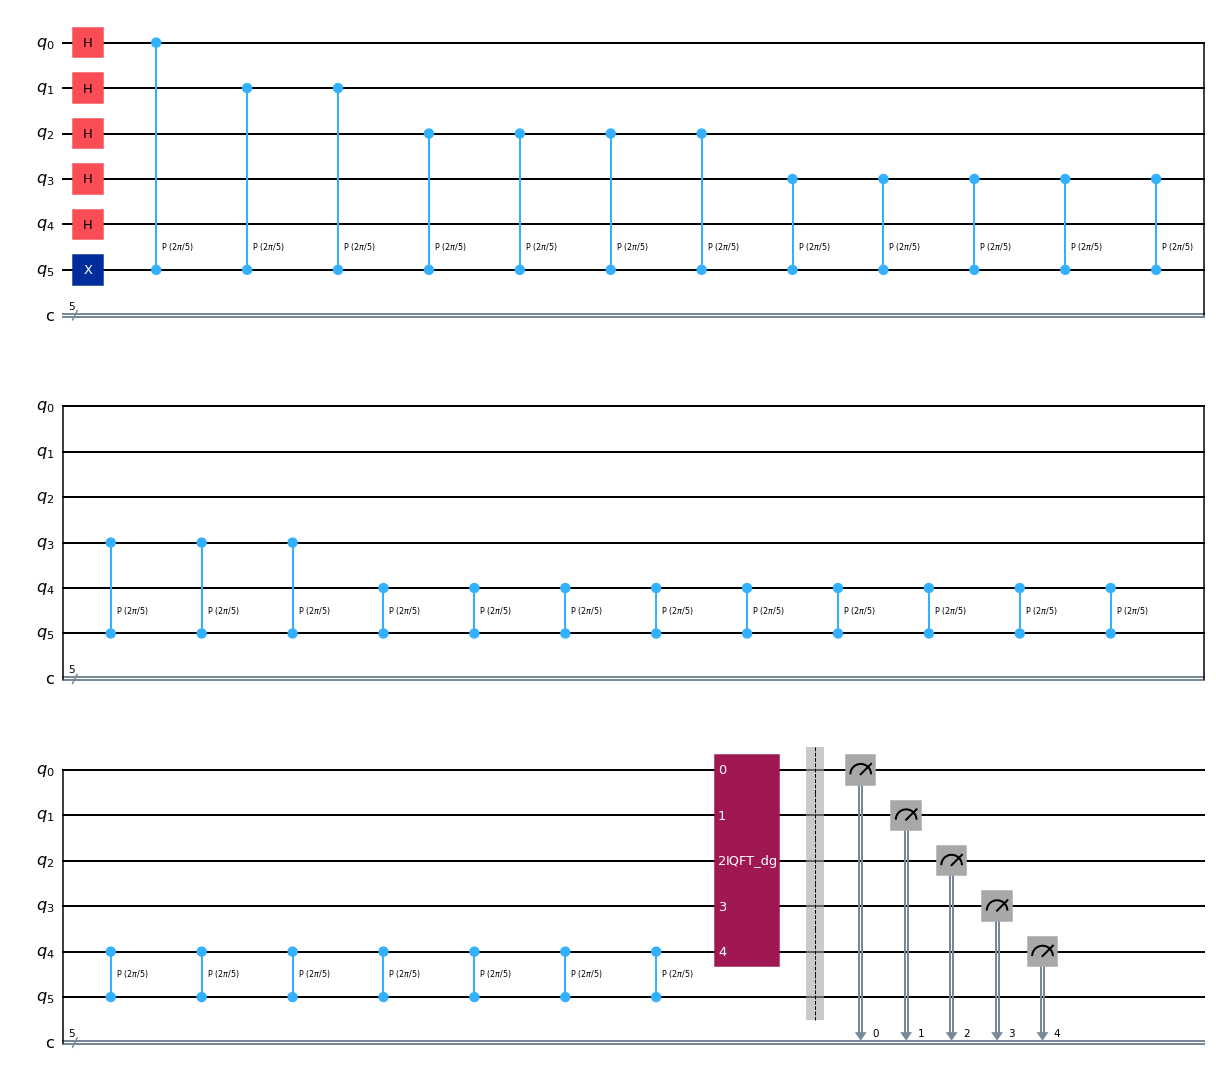

In [24]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2* math.pi/5
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw( output='mpl', filename='h_gate.png')

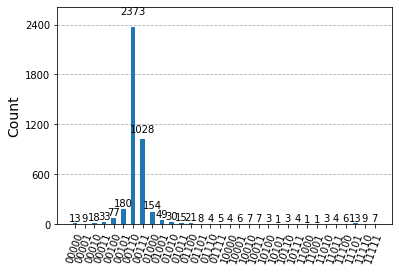

In [13]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


In [30]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import numpy as np
from IPython.display import display


class KQPE:
    """
    Implements Kitaev's phase estimation algorithm where a single circuit
    is used to estimate the phase of a unitary, but the measurements are
    exponential.
    
    Attributes:
        precision (int): The precision up to which the phase needs to be estimated.
                        NOTE: precision is estimated as 2^(-precision)
        
        unitary (np.ndarray or QuantumCircuit or UnitaryGate): The unitary matrix for which
                        we want to find the phase, given its eigenvector.
        qubits (int): The number of qubits on which the unitary matrix acts.

    Methods:
        get_phase(QC, ancilla, clbits, backend, show): Generate the resultant phase associated with the given unitary
                      and the given eigenvector.
        get_circuit(show, save_circ, circ_name): Generate a Kitaev phase estimation circuit which can be attached
                      to the parent quantum circuit containing eigenvector of the unitary matrix.
    """

    def __init__(self, unitary, precision=10):
        # Handle precision
        if not isinstance(precision, int):
            raise TypeError("Precision needs to be an integer")
        elif precision <= 0:
            raise ValueError("Precision needs to be >=0")

        self.precision = 1 / (2 ** precision)

        # Handle unitary
        if unitary is None:
            raise Exception("Unitary needs to be specified for the Kitaev QPE algorithm")
        elif (
            not isinstance(unitary, np.ndarray)
            and not isinstance(unitary, QuantumCircuit)
            and not isinstance(unitary, UnitaryGate)
        ):
            raise TypeError(
                "A numpy array, QuantumCircuit or UnitaryGate needs to be passed as the unitary matrix"
            )

        self.unitary = unitary

        # Get the number of qubits in the unitary
        if isinstance(unitary, np.ndarray):
            self.qubits = int(np.log2(unitary.shape[0]))
        else:
            self.qubits = int(unitary.num_qubits)

    def get_phase(self, QC, ancilla, clbits, backend, show=False):
        # Handle circuit
        if not isinstance(QC, QuantumCircuit):
            raise TypeError("A QuantumCircuit must be provided for generating the phase")

        if len(QC.clbits) < 2:
            raise Exception("At least 2 classical bits needed for measurement")
        elif len(QC.qubits) < 3:
            raise Exception("Quantum Circuit needs to have at least 3 qubits")

        # Handle bits
        elif len(ancilla) != 2 or ancilla is None:
            raise Exception("Exactly two ancilla bits need to be specified")
        elif len(clbits) != 2 or clbits is None:
            raise Exception("Exactly two classical bits need to be specified for measurement")
        elif len(set(clbits)) != len(clbits) or len(set(ancilla)) != len(ancilla):
            raise Exception("Duplicate bits provided in lists")

        # Find number of shots -> at least Big-O(1/precision shots)
        shots = 10 * int(1 / self.precision)
        if show:
            print("Shots:", shots)

        # Measure into the given bits
        QC.measure([ancilla[0], ancilla[1]], [clbits[0], clbits[1]])

        if show:
            display(QC.draw("mpl"))

        # Transpile and execute the circuit
        compiled_circuit = transpile(QC, backend=backend, optimization_level=3)
        job = backend.run(compiled_circuit, shots=shots)
        result = job.result()
        counts = result.get_counts()

        if show:
            print("Measurement results:", counts)
            display(plot_histogram(counts))

        # Now get the results
        C0, C1, S0, S1 = 0, 0, 0, 0
        first = clbits[0]
        second = clbits[1]
        for i, j in zip(list(counts.keys()), list(counts.values())):
            # Get bits
            l = len(i)
            one = i[l - first - 1]
            two = i[l - second - 1]

            # First qubit 0 - C (0,theta)
            if one == "0":
                C0 += j
            else:
                C1 += j

            # Second qubit 0 - S (0,theta)
            if two == "0":
                S0 += j
            else:
                S1 += j

        # Normalize
        C0, C1, S0, S1 = C0 / shots, C1 / shots, S0 / shots, S1 / shots

        # Determine theta_0
        tan_1 = np.arctan2([(1 - 2 * S0)], [(2 * C0 - 1)])[0]
        theta_0 = (1 / (2 * np.pi)) * tan_1

        # Determine theta_1
        tan_2 = np.arctan2([(2 * S1 - 1)], [(1 - 2 * C1)])[0]
        theta_1 = (1 / (2 * np.pi)) * tan_2

        phase_dec = np.average([theta_0, theta_1])
        phase_binary = []
        phase = phase_dec

        # Generate the binary representation
        for i in range(int(np.log2((1 / self.precision)))):
            phase *= 2
            if phase < 1:
                phase_binary.append(0)
            else:
                phase -= 1
                phase_binary.append(1)

        return phase_dec, phase_binary

    def get_circuit(self, show=False, save_circ=False, circ_name="KQPE_circ.JPG"):
        """Returns a Kitaev phase estimation circuit with the unitary provided.

        Args:
            show (bool): Whether to draw the circuit or not (Default - False).
            save_circ (bool): Whether to save the circuit as an image or not (Default - False).
            circ_name (str): Filename with which the circuit is stored (Default - KQPE_circ.JPG).

        Returns:
            QuantumCircuit: A QuantumCircuit with the controlled unitary matrix and relevant gates attached.
                           Size of the circuit is (2 + number of qubits in the unitary).

        Examples:
            theta = 1/5
            unitary = UnitaryGate(np.array([[1, 0], [0, np.exp(2 * np.pi * 1j * theta)]]))
            kqpe = KQPE(unitary, precision=10)
            kq_circ = kqpe.get_circuit(show=True, save_circ=True, circ_name="KQPE_circ_1qubit.JPG")

            # Attaching the circuit
            q = QuantumCircuit(5, 6)
            q.x(3)
            q.append(kq_circ, qargs=[1, 2, 3])
            q.draw('mpl')
        """
        qc = QuantumCircuit(2 + self.qubits, name="KQPE")
        qubits = [i for i in range(2, 2 + self.qubits)]

        # Make the unitary
        if isinstance(self.unitary, np.ndarray):
            U = UnitaryGate(data=self.unitary)
            C_U = U.control(num_ctrl_qubits=1, label="CU", ctrl_state="1")
        else:
            C_U = self.unitary.control(num_ctrl_qubits=1, label="CU", ctrl_state="1")

        # Qubit 0 is for the H estimation
        qc.h(0)
        qc = qc.compose(C_U, qubits=[0] + qubits)
        qc.h(0)
        qc.barrier()

        # Qubit 1 is for the H + S estimation
        qc.h(1)
        qc.s(1)
        qc = qc.compose(C_U, qubits=[1] + qubits)
        qc.h(1)

        qc.barrier()
        if show:
            if save_circ:
                display(qc.draw("mpl", filename=circ_name))
            else:
                display(qc.draw("mpl"))

        return qc


In [31]:
U = np.array([[1, 0],
              [0, np.exp(2*np.pi*1j*(1/5))]])

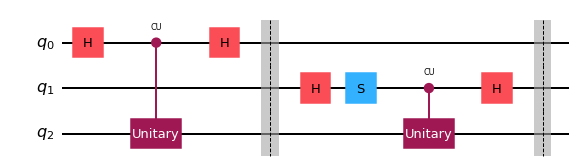

In [32]:
kqpe = KQPE(unitary=U, precision=16)
kq_circ = kqpe.get_circuit(show=True, save_circ=True,
                           circ_name="KQPE_circ_1qubit.JPG")

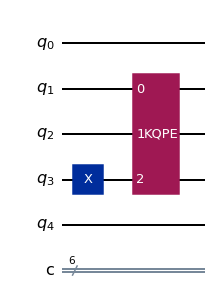

In [33]:
q = QuantumCircuit(5, 6)
q.x(3)
q.append(kq_circ, qargs=[1, 2, 3])
q.draw('mpl')

Shots: 655360


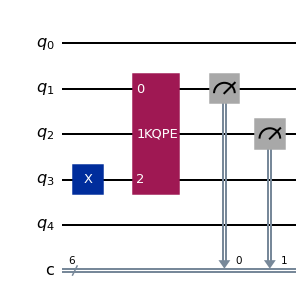

Measurement results: {'000010': 418216, '000011': 221154, '000000': 10359, '000001': 5631}


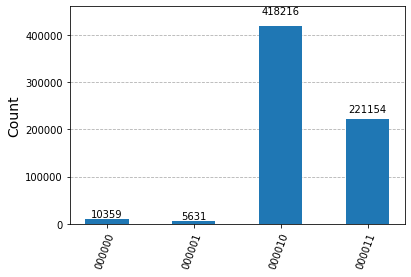

In [34]:
phase = kqpe.get_phase(backend=Aer.get_backend(
    'qasm_simulator'), QC=q, ancilla=[1, 2], clbits=[0, 1], show=True)

In [35]:
print("Phase of the unitary is :", phase)

Phase of the unitary is : (0.20017520900583435, [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])


In [36]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import Aer
import numpy as np
import random

def random_number_qpe(n_qubits):
    # Create the quantum circuit with n_qubits + 1 (for the eigenstate)
    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    
    # Apply Hadamard gates to the first n_qubits to create superposition
    for qubit in range(n_qubits):
        qc.h(qubit)
    
    # Apply a controlled unitary operation U with a random phase
    for qubit in range(n_qubits):
        random_phase = random.uniform(0, 2 * np.pi)
        qc.cp(random_phase, qubit, n_qubits)
    
    # Apply the inverse Quantum Fourier Transform
    qft_dagger = QFT(num_qubits=n_qubits, inverse=True)
    qc.append(qft_dagger, range(n_qubits))
    
    # Measure the first n_qubits
    qc.measure(range(n_qubits), range(n_qubits))
    
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    
    # Extract a random measured value from the counts
    measured_value = int(random.choice(list(counts.keys())), 2)
    return measured_value

# Example usage
n_qubits = 3  # Number of qubits to use for the random number generator
random_number = random_number_qpe(n_qubits)
print("Random number generated:", random_number)



Random number generated: 0


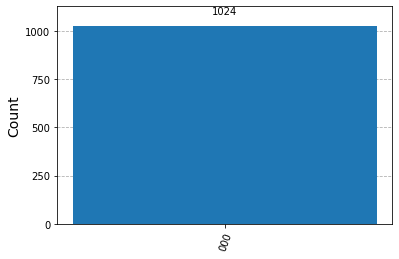

In [37]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram

# Number of qubits for the first register (precision of phase estimation)
n = 3  # This will give an accuracy of 2^(-3)

# Create a quantum circuit with n+1 qubits (n for the first register, 1 for the second)
qc = QuantumCircuit(n + 1, n)

# Step 1: Apply Hadamard gates to the first register
for qubit in range(n):
    qc.h(qubit)

# Step 2: Controlled unitary U(pi/4) gates
theta = 2*np.pi / 5  # Your chosen phase (pi/4)
for qubit in range(n):
    qc.cp(theta * 2 ** qubit, qubit, n)  # Apply controlled phase gates

# Step 3: Apply the inverse Quantum Fourier Transform to the first register
qc.append(QFT(n, inverse=True), range(n))

# Step 4: Measure the first register
qc.measure(range(n), range(n))

# Use the Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Plot the result as a histogram
plot_histogram(counts)


In [38]:
>>> from qiskit.circuit import QuantumCircuit, Parameter
>>> angles = [Parameter("angle_1"), Parameter("angle_2"), Parameter("angle_10")]
>>> circuit = QuantumCircuit(1)
>>> circuit.u(*angles, 0)
>>> circuit.draw()


┌─────────────────────────────┐
q: ┤ U(angle_1,angle_2,angle_10) ├
   └─────────────────────────────┘

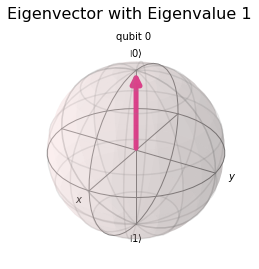

In [39]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import Aer
import numpy as np
from qiskit import transpile

# Create a single-qubit quantum circuit
qc = QuantumCircuit(1)

# Apply a phase shift of 2*pi/5 radians using an RZ gate, which is equivalent to your matrix
qc.rz(2 * np.pi / 5, 0)

# Use Aer to get the statevector
backend = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend)
result = backend.run(qc).result()
statevector = result.get_statevector()

# Visualize on Bloch sphere
plot_bloch_multivector(statevector,title='Eigenvector with Eigenvalue 1')


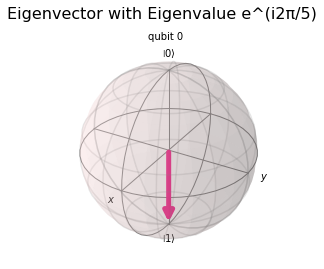

In [40]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import Aer
import numpy as np
from qiskit import transpile

# Create a single-qubit quantum circuit for the first eigenvector
qc1 = QuantumCircuit(1)

# Apply a phase shift of 2*pi/5 radians using an RZ gate, which is equivalent to your matrix
qc1.rz(2 * np.pi / 5, 0)

# Use Aer to get the statevector for the first eigenvector
backend = Aer.get_backend('statevector_simulator')
qc1 = transpile(qc1, backend)
result1 = backend.run(qc1).result()
statevector1 = result1.get_statevector()

# Visualize the first eigenvector on Bloch sphere
plot_bloch_multivector(statevector1, title='Eigenvector with Eigenvalue 1')

# Create a single-qubit quantum circuit for the second eigenvector
qc2 = QuantumCircuit(1)
qc2.x(0)  # Apply X gate to prepare the |1> state
qc2.rz(2 * np.pi / 5, 0)

# Use Aer to get the statevector for the second eigenvector
qc2 = transpile(qc2, backend)
result2 = backend.run(qc2).result()
statevector2 = result2.get_statevector()

# Visualize the second eigenvector on Bloch sphere
plot_bloch_multivector(statevector2, title='Eigenvector with Eigenvalue e^(i2π/5)')



In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import numpy as np

# Function to implement QPE-based Quantum Random Number Generator
def qpe_random_number_generator(num_qubits):
    # Initialize a Quantum Circuit with num_qubits ancilla qubits and 1 target qubit
    qc = QuantumCircuit(num_qubits + 1, num_qubits)
    
    # Step 1: Apply Hadamard gates to all ancilla qubits to create superposition
    for qubit in range(num_qubits):
        qc.h(qubit)
    
    # Step 2: Prepare the target qubit in the |1> state (eigenstate of the unitary)
    qc.x(num_qubits)
    
    # Step 3: Apply controlled-U operations with increasing powers
    repetitions = 1
    for qubit in range(num_qubits):
        qc.cp(2 * np.pi / 5 * repetitions, qubit, num_qubits)  # Controlled-phase gate
        repetitions *= 2
    
    # Step 4: Apply the inverse Quantum Fourier Transform to the ancilla qubits
    qft_dg = QFT(num_qubits, inverse=True).to_instruction()
    qc.append(qft_dg, range(num_qubits))
    
    # Step 5: Measure the ancilla qubits to obtain the random output
    qc.measure(range(num_qubits), range(num_qubits))
    
    # Transpile the circuit for the simulator
    backend = Aer.get_backend('aer_simulator')
    qc = transpile(qc, backend)
    
    # Execute the circuit on a simulator
    job = backend.run(qc, shots=1)  # Only one shot needed for a random number
    result = job.result()
    counts = result.get_counts()
    
    # Extract the measured bitstring
    random_bitstring = list(counts.keys())[0]
    return random_bitstring

# Example usage
num_qubits = 7 # Number of qubits used to determine the precision of the phase estimation

for i in range(6):
    random_number = qpe_random_number_generator(num_qubits)
    print(f"Random number (bitstring) generated using QPE: {random_number}")


Random number (bitstring) generated using QPE: 0011011
Random number (bitstring) generated using QPE: 0011010
Random number (bitstring) generated using QPE: 0011010
Random number (bitstring) generated using QPE: 0011010
Random number (bitstring) generated using QPE: 0011010
Random number (bitstring) generated using QPE: 0010110


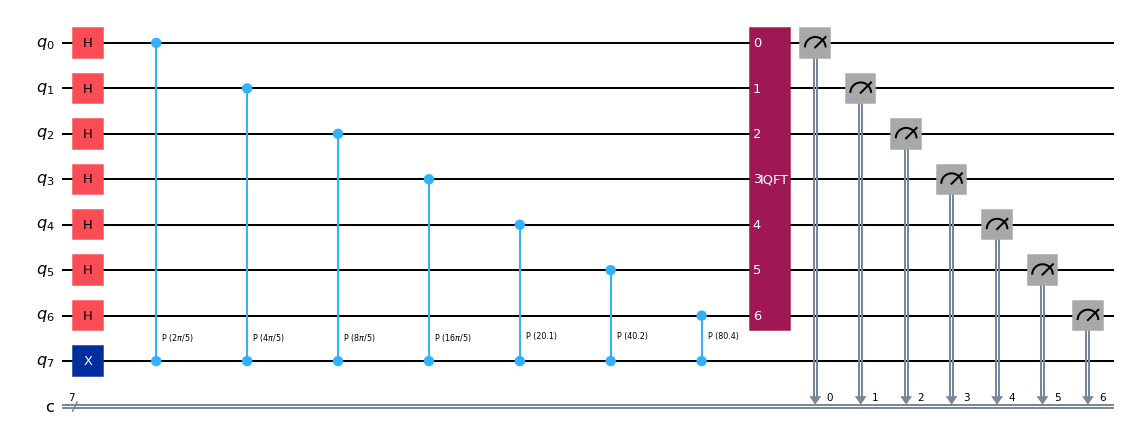

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

# Function to create the QPE quantum circuit
def create_qpe_circuit(num_qubits):
    # Initialize a Quantum Circuit with num_qubits ancilla qubits and 1 target qubit
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    # Step 1: Apply Hadamard gates to all ancilla qubits to create superposition
    for qubit in range(num_qubits):
        qc.h(qubit)

    # Step 2: Prepare the target qubit in the |1> state (eigenstate of the unitary)
    qc.x(num_qubits)

    # Step 3: Apply controlled-U operations with increasing powers
    repetitions = 1
    for qubit in range(num_qubits):
        qc.cp(2 * np.pi / 5 * repetitions, qubit, num_qubits)  # Controlled-phase gate
        repetitions *= 2

    # Step 4: Apply the inverse Quantum Fourier Transform to the ancilla qubits
    qft_dg = QFT(num_qubits, inverse=True).to_instruction()
    qc.append(qft_dg, range(num_qubits))

    # Step 5: Measure the ancilla qubits to obtain the random output
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

# Create the QPE circuit
num_qubits = 7  # Number of qubits used to determine the precision of the phase estimation
qpe_circuit = create_qpe_circuit(num_qubits)

# Draw the quantum circuit
qpe_circuit.draw('mpl')


In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import numpy as np
import random

# Function to implement QPE-based Quantum Random Number Generator
def qpe_random_number_generator(num_qubits):
    # Initialize a Quantum Circuit with num_qubits ancilla qubits and 1 target qubit
    qc = QuantumCircuit(num_qubits + 1, num_qubits)
    
    # Step 1: Apply Hadamard gates to all ancilla qubits to create superposition
    for qubit in range(num_qubits):
        qc.h(qubit)
    
    # Step 2: Prepare the target qubit in the |1> state (eigenstate of the unitary)
    qc.x(num_qubits)
    
    # Step 3: Apply controlled-U operations with increasing powers and random phase
    random_phase = random.uniform(0, 2 * np.pi)  # Random phase to ensure different output each time
    repetitions = 1
    for qubit in range(num_qubits):
        qc.cp(random_phase * repetitions, qubit, num_qubits)  # Controlled-phase gate with random phase
        repetitions *= 2
    
    # Step 4: Apply the inverse Quantum Fourier Transform to the ancilla qubits
    qft_dg = QFT(num_qubits, inverse=True).to_instruction()
    qc.append(qft_dg, range(num_qubits))
    
    # Step 5: Measure the ancilla qubits to obtain the random output
    qc.measure(range(num_qubits), range(num_qubits))
    
    # Transpile the circuit for the simulator
    backend = Aer.get_backend('aer_simulator')
    qc = transpile(qc, backend)
    
    # Execute the circuit on a simulator
    job = backend.run(qc, shots=1)  # Only one shot needed for a random number
    result = job.result()
    counts = result.get_counts()
    
    # Extract the measured bitstring
    random_bitstring = list(counts.keys())[0]

    return random_bitstring

# Example usage
def generate_random_numbers(num_qubits, iterations):
    previous_number = None
    results = []

    for i in range(iterations):
        random_bitstring = qpe_random_number_generator(num_qubits)
        random_number = int(random_bitstring, 2)  # Convert bitstring to decimal
        
        if previous_number is not None:
            # Use the output of the last loop: square it, divide by the next output, and output the result
            try:
                result = (previous_number ** 2) / random_number if random_number != 0 else 0
            except ZeroDivisionError:
                result = 0  # Handle division by zero
            results.append(result)
            print(f"Result of iteration {i}: {result}")
        else:
            print(f"Initial random number (bitstring) generated using QPE: {random_bitstring} -> {random_number}")
        
        previous_number = random_number
    
    return results

# Run the function
generate_random_numbers(num_qubits=8, iterations=6)


Initial random number (bitstring) generated using QPE: 10001100 -> 140
Result of iteration 1: 135.17241379310346
Result of iteration 2: 89.85042735042735
Result of iteration 3: 247.76470588235293
Result of iteration 4: 595.6219512195122
Result of iteration 5: 61.68807339449541


[135.17241379310346,
 89.85042735042735,
 247.76470588235293,
 595.6219512195122,
 61.68807339449541]

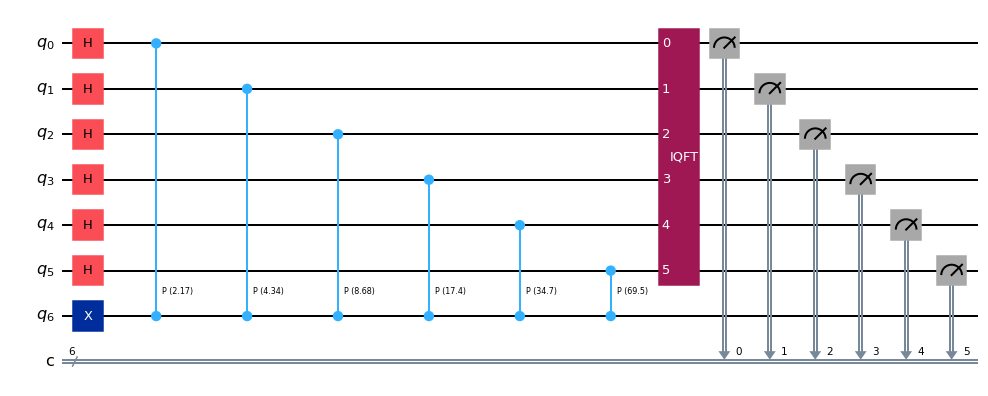

In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to implement QPE-based Quantum Random Number Generator
def qpe_random_number_generator(num_qubits):
    # Initialize a Quantum Circuit with num_qubits ancilla qubits and 1 target qubit
    qc = QuantumCircuit(num_qubits + 1, num_qubits)
    
    # Step 1: Apply Hadamard gates to all ancilla qubits to create superposition
    for qubit in range(num_qubits):
        qc.h(qubit)
    
    # Step 2: Prepare the target qubit in the |1> state (eigenstate of the unitary)
    qc.x(num_qubits)
    
    # Step 3: Apply controlled-U operations with increasing powers and random phase
    random_phase = random.uniform(0, 2 * np.pi)  # Random phase to ensure different output each time
    repetitions = 1
    for qubit in range(num_qubits):
        qc.cp(random_phase * repetitions, qubit, num_qubits)  # Controlled-phase gate with random phase
        repetitions *= 2
    
    # Step 4: Apply the inverse Quantum Fourier Transform to the ancilla qubits
    qft_dg = QFT(num_qubits, inverse=True).to_instruction()
    qc.append(qft_dg, range(num_qubits))
    
    # Step 5: Measure the ancilla qubits to obtain the random output
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc

# Example usage
num_qubits = 6
qc = qpe_random_number_generator(num_qubits)

# Draw the circuit

qc.draw('mpl', filename='quantum_circuit.png')